<a href="https://colab.research.google.com/github/nestorbalcazar/nestorbalcazar.github.io/blob/master/Fins_P04_PlaneWallsRectFins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
### ==========================================================================
### Subject:    Heat and Mass Transfer
### Topic:      Tube with $N_a$ circular fins (Adiabatic end).  Solution with Bessel functions.
### Author:     Prof. Nestor Balcazar Arciniega
### Updated:    28 February 2023
### ==========================================================================

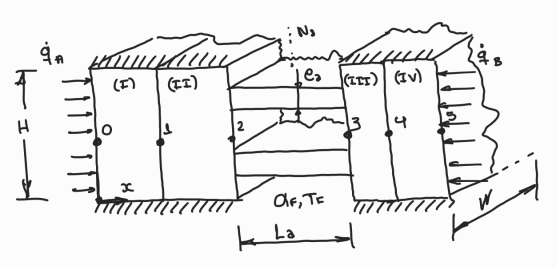

In [ ]:
!pip install numpy matplotlib scipy

**STEP 0**:  $\text{Input data:} \, H \, , \,
W \, , \,
e_n \, , \,
e_m \, , \,
L_a \, , \,
e_a \, , \,
N_a \, , \,
\dot{q}_A \, , \,
\dot{q}_B \, , \,
T_g \, , \,
\alpha_g \, , \,
\lambda_n \, , \,
\lambda_m \, , \,
\lambda_a. \, \, \,
$.  Furthermore, $\dot{q}_{v,I}=\dot{q}_{v,II}=\dot{q}_{v,III}=\dot{q}_{v,IV}=0$.  

Thermophysical and geometrical parameters:  
\begin{align*}
\lambda_I & = \lambda_n \\
\lambda_{II} & = \lambda_m \\
\lambda_{III} & = \lambda_m \\
\lambda_{IV} & = \lambda_n \\
x_0 & = 0 \, \\
x_1 & = x_0 + e_n \\
x_2 & = x_1 + e_m \\
x_3 & = x_2 + L_a \\
x_4 & = x_3 + e_m \\
x_5 & = x_4 + e_n \\
S_{a2} & = W \cdot e_a \\
S_{a3} & = W \cdot e_a \\
m & = \sqrt{\frac{2 \alpha_g}{\lambda_a e_a}}
\end{align*}

**STEP 1**: $T(x)$ and $\dot{q}(x)$ for the plane wall and fin with constant cross section.

**STEP 2**: Local energy balances:
\begin{align*}
0 & = \dot{q}_A - \left(-\lambda_I \frac{T_1 - T_0}{x_1 - x_0}\right) \\
0 & = \left(-\lambda_I \frac{T_1 - T_0}{x_1 - x_0}\right) - \left(-\lambda_{II} \frac{T_2 - T_1}{x_2 - x_1}\right) \\
0 & = \left(-\lambda_{II} \frac{T_2 - T_1}{x_2 - x_1}\right) W H - \left(\alpha_g (T_2 - T_g)(W H - N_a S_{a2}) + N_a \dot{Q}_{a2}\right) \\
\dot{Q}_{a2} & = -\lambda_a m \left(C_{1a} e^{m x_2} - C_{2a} e^{-m x_2}\right) S_{a2} \\
(T_2 - T_g) & = \left(C_{1a} e^{m x_2} + C_{2a} e^{-m x_2}\right) \\
(T_3 - T_g) & = \left(C_{1a} e^{m x_3} + C_{2a} e^{-m x_3}\right) \\
0 & = \left(-\lambda_{III} \frac{T_4 - T_3}{x_4 - x_3}\right) W H - \left(\alpha_g (T_g - T_3)(W H - N_a S_{a3}) + N_a \dot{Q}_{a3}\right) \\
\dot{Q}_{a3} & =  -\lambda_a m \left(C_{1a} e^{m x_3} - C_{2a} e^{-m x_3}\right) S_{a3} \\
0 & = \left(-\lambda_{III} \frac{T_4 - T_3}{x_4 - x_3}\right) - \left(-\lambda_{IV} \frac{T_5 - T_4}{x_5 - x_4}\right) \\
0 & = \left(-\lambda_{IV} \frac{T_5 - T_4}{x_5 - x_4}\right) - (-\dot{q}_B)
\end{align*}
Equivalent system of equations:
\begin{align*}
F_0(T_0, T_1) &= 0 \\
F_1(T_0,T_1, T_2) &= 0 \\
F_2(T_1,T_2, \dot{Q}_{a2}) &= 0 \\
F_3(C_{1a}, C_{2a}, \dot{Q}_{a2}) &= 0 \\
F_4(T_2, C_{1a}, C_{2a}) &= 0 \\
F_5(T_3, C_{1a}, C_{2a}) &= 0 \\
F_6(T_3, T_4, \dot{Q}_{a3}) &= 0 \\
F_7(C_{1a}, C_{2a}, \dot{Q}_{a3}) &= 0 \\
F_8(T_3, T_4, T_5) &= 0 \\
F_9(T_4, T_5) &= 0 \\
\end{align*}
**STEP 3**: Global energy balance.
\begin{align*}
0= \{ \dot{q}_{A} S_{0} + \dot{q}_{B} S_{5} \} - \left\{ \alpha_g (T_2-T_g) (S_2-N_a S_{a2}) + \alpha_g (T_3-T_g) (S_3-N_a S_{a3}) + N_a \int_{A_a} \alpha_g (T_{a}(x)-T_g) dA_a \right \}
\end{align*}

REPORT:
T1      = 85.281420 [C]
T2      = 83.008693 [C]
T3      = 640.554738 [C]
T4      = 663.282011 [C]
T5      = 708.736556 [C]
Q0      = 25000.000000 [W]
Q5      = 250000.000000 [W]
Qconv2  = 661.591275 [W]
Qconv3  = 6515.824748 [W]
Qa2     = 243.384087 [W]
Qa3     = -2434.841753 [W]
Qconva  = 2678.225840 [W].  Qa2 should be equal to Qconva
Na      = 100.000000
Na·Qa2  = 24338.408725 [W]
Global energy balance:
Res_GlobEnergyBal = (Q0 + Q5) - (Qconv2 + Qconv3 + Na Qconva)  = 0.000000 [W]


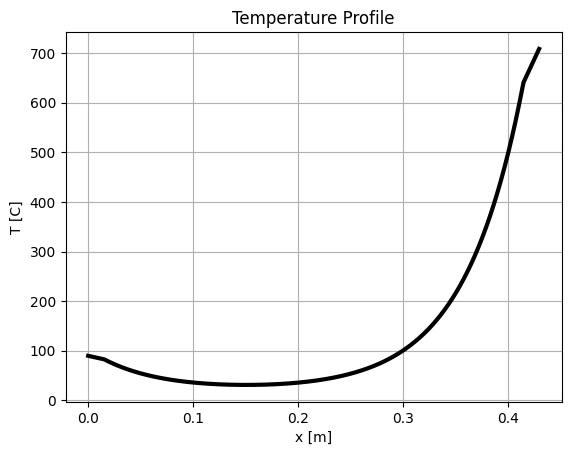

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import iv, kv
from scipy.integrate import quad

#STEP 0: Input data (reference case)
H = 0.5  # m
W = 0.5  # m
en = 0.01  # m
em = 0.005  # m
La = 0.4  # m
ea = 0.002  # m
Na = 100  # W/m3
qA = 1e5  # W/m2
qB = 1e6  # W/m2
Tg = 20  # C
alphag  = 70  # W/(m2 K)
lambdan = 220  # W/(m K)
lambdam = 220  # W/(m K)
lambdaa = 220  # W/(m K)

# Parameters
lambdaI   = lambdan
lambdaII  = lambdam
lambdaIII = lambdam
lambdaIV  = lambdan
x0 = 0  # m
x1 = x0 + en
x2 = x1 + em
x3 = x2 + La
x4 = x3 + em
x5 = x4 + en
S0 = W * H
S1 = W * H
S2 = W * H
S3 = W * H
S4 = W * H
S5 = W * H
Sa = W * ea
Sa2 = W * ea
Sa3 = W * ea
m = np.sqrt(2 * alphag / (lambdaa * ea))

#STEP 1:  T(x) and q(x) for each component
def fTa(x,C1,C2):
  return Tg + (C1 * np.exp(m * x) + C2 * np.exp(-m * x))

def fqa(x,C1,C2):
  return -lambdaa * m * (C1 * np.exp(m * x) - C2 * np.exp(-m * x))

#STEP 2:  Verification
def FunTermotFin(X):
    T0, T1, T2, T3, T4, T5, Qa2, Qa3, C1a, C2a = X

    F = np.zeros(10)
    F[0] = qA - (-lambdaI * ((T1 - T0) / (x1 - x0)))
    F[1] = (-lambdaI * ((T1 - T0) / (x1 - x0))) - (-lambdaII * ((T2 - T1) / (x2 - x1)))
    F[2] = (-lambdaII * ((T2 - T1) / (x2 - x1))) * S2- (alphag * (T2 - Tg) * (S2 - Na * Sa2) + Na * Qa2)
    F[3] = Qa2 - (fqa(x2,C1a,C2a) * Sa2)
    F[4] = T2 - fTa(x2,C1a,C2a)
    F[5] = T3 - fTa(x3,C1a,C2a)
    F[6] = (alphag * (Tg - T3) * (S3 - Na * Sa3) + Na * Qa3) - (-lambdaIII * ((T4 - T3) / (x4 - x3)) * S3)
    F[7] = Qa3 - (fqa(x3,C1a,C2a) * Sa3)
    F[8] = (-lambdaIII * ((T4 - T3) / (x4 - x3))) - (-lambdaIV * ((T5 - T4) / (x5 - x4)))
    F[9] = (-lambdaIV * ((T5 - T4) / (x5 - x4))) + qB

    return F

X0 = np.array([20, 20, 20, 20, 20, 20, 0, 0, 1, 1])  # Estimated values [T0, T1, T2, T3, T4, T5, Qa2, Qa3, C1a, C2a ]
X  = fsolve(FunTermotFin, X0)


#STEP 3:  Verification
# Verification
T0, T1, T2, T3, T4, T5, Qa2, Qa3, C1a, C2a = X
Q0     = qA * S0
Q5     = qB * S5
Qconv2 = alphag * (T2 - Tg) * (S2-Na*Sa2)
Qconv3 = alphag * (T3 - Tg) * (S3-Na*Sa3)

# Call fQconv_a after defining it
def Qconvar_dAa(x):
    return alphag * (fTa(x,C1a,C2a) - Tg) * (2*(W)) #Lateral surface is adiabatic

Qconva, _ = quad(Qconvar_dAa, x2, x3)

Res_GlobEnergyBal = (Q0 + Q5) - (Qconv2 + Qconv3 + Na*Qconva)  # Should be equal to zero

# Displaying results
def printReport():
    print("==============================================================================")
    print("REPORT:")
    print(f"T1      = {T1:.6f} [C]")
    print(f"T2      = {T2:.6f} [C]")
    print(f"T3      = {T3:.6f} [C]")
    print(f"T4      = {T4:.6f} [C]")
    print(f"T5      = {T5:.6f} [C]")
    print(f"Q0      = {Q0:.6f} [W]")
    print(f"Q5      = {Q5:.6f} [W]")
    print(f"Qconv2  = {Qconv2:.6f} [W]")
    print(f"Qconv3  = {Qconv3:.6f} [W]")
    print(f"Qa2     = {Qa2:.6f} [W]")
    print(f"Qa3     = {Qa3:.6f} [W]")
    print(f"Qconva  = {Qconva:.6f} [W].  Qa2 should be equal to Qconva")
    print(f"Na      = {Na:.6f}")
    print(f"Na·Qa2  = {Na * Qa2:.6f} [W]")
    print(f"Global energy balance:")
    print(f"Res_GlobEnergyBal = (Q0 + Q5) - (Qconv2 + Qconv3 + Na Qconva)  = {Res_GlobEnergyBal:.6f} [W]")
    print("==============================================================================")

# Print the report
printReport()

# Temperature profiles
dx = (x5 - x0) / 10000
x = np.arange(x0, x5, dx)

# Calculate temperature profiles
TI   = (X[0] + ((X[1] - X[0]) / (x1 - x0)) * (x - x0)) * ((x >= x0) & (x < x1))
TII  = (X[1] + ((X[2] - X[1]) / (x2 - x1)) * (x - x1)) * ((x >= x1) & (x <= x2))
TIII = (X[3] + ((X[4] - X[3]) / (x4 - x3)) * (x - x3)) * ((x >= x3) & (x < x4))
TIV  = (X[4] + ((X[5] - X[4]) / (x5 - x4)) * (x - x4)) * ((x >= x4) & (x <= x5))
Ta   = fTa(x,C1a,C2a) * ((x > x2) & (x < x3))

# Combine temperature profiles
T    = TI + TII + Ta + TIII + TIV

# Plot temperature profile
plt.plot(x, T, '-', linewidth=3, color='k')
plt.xlabel('x [m]')
plt.ylabel('T [C]')
plt.axis('tight')
#plt.axis('square')
plt.title('Temperature Profile')
plt.grid()
plt.savefig('TermotFin4A.png')
plt.show()
